In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sympy import appellf1

In [2]:
sketch_img = cv.imread('../../../class.vision/images/sketch.png')
shapes2_img = cv.imread('../../../class.vision/images/shapes2.png')
approx_img = cv.imread('../../../class.vision/images/approx.jpg')

In [23]:
def to_gray(img):
    return cv.cvtColor(img, cv.COLOR_BGR2GRAY)

## Explore ArcLen

arcLength: 152.0
Shape Perimeter: 156


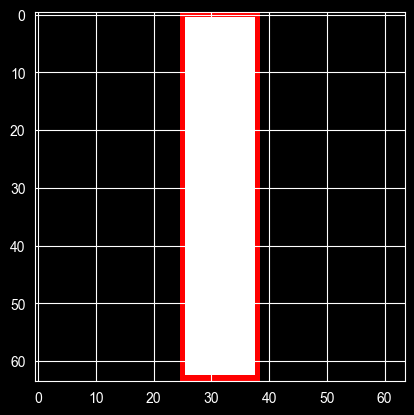

In [21]:
H = 64
SHAPE_W = 14
simple_binary_img = np.array([
    [0]*((H-SHAPE_W)//2) + [255] * SHAPE_W + [0]*((H-SHAPE_W)//2),
] * H, dtype=np.uint8)

draw_img = simple_binary_img.copy()
draw_img = cv.cvtColor(draw_img, cv.COLOR_GRAY2BGR)

contours, _ = cv.findContours(simple_binary_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(draw_img, contours, -1, (0, 0, 255), 1)

plt.imshow(draw_img[...,::-1])
print("arcLength:", cv.arcLength(contours[0], True))
print("Shape Perimeter:", H*2+SHAPE_W*2)

## Explore ApproxPolyDP

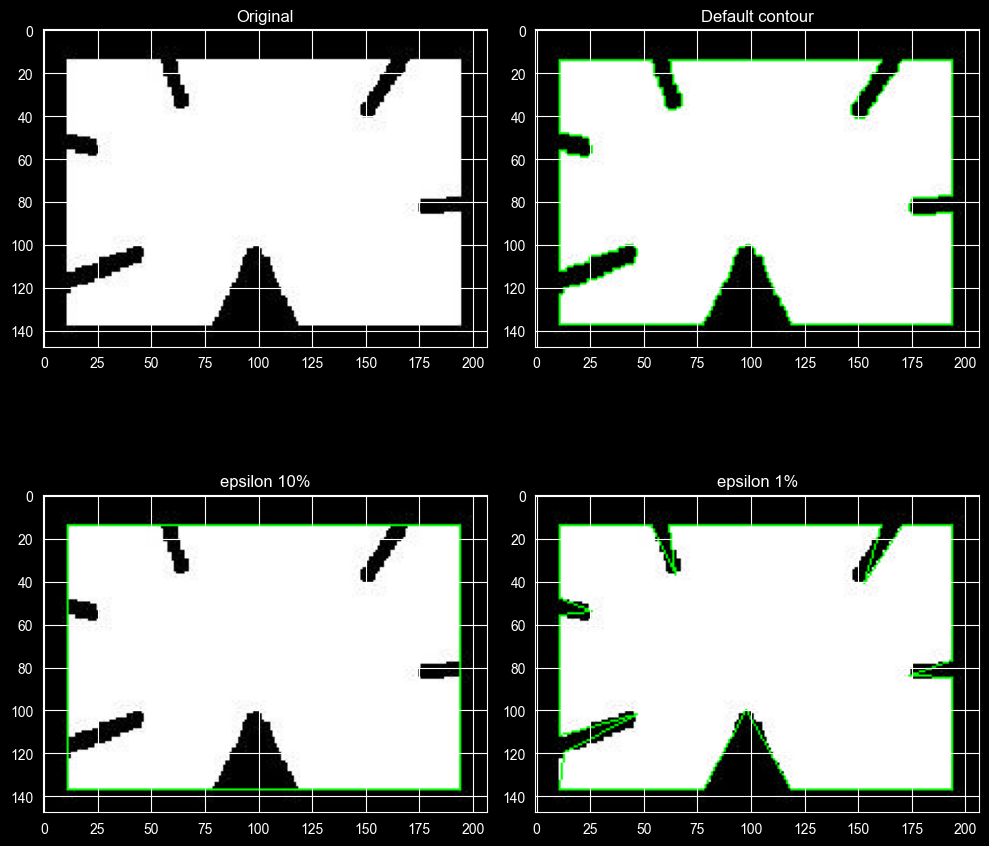

Len cnt: 210
Len app1: 4
Len app2: 22


In [34]:
_, binary_img = cv.threshold(to_gray(approx_img), 127, 255, cv.THRESH_BINARY)
contours, _ = cv.findContours(binary_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
arcLen = cv.arcLength(cnt, True)

app1 = cv.approxPolyDP(cnt, arcLen * 0.1, True)
app2 = cv.approxPolyDP(cnt, arcLen * 0.01, True)

default_cnt = cv.drawContours(approx_img.copy(), [cnt], -1, (0, 255, 0), 1)
app1_cnt = cv.drawContours(approx_img.copy(), [app1], -1, (0, 255, 0), 1)
app2_cnt = cv.drawContours(approx_img.copy(), [app2], -1, (0, 255, 0), 1)


plt.figure(figsize=(10,10))
plt.subplot(221);plt.imshow(approx_img[...,::-1]); plt.title("Original")
plt.subplot(222);plt.imshow(default_cnt[...,::-1]); plt.title("Default contour")
plt.subplot(223);plt.imshow(app1_cnt[...,::-1]); plt.title("epsilon 10%")
plt.subplot(224);plt.imshow(app2_cnt[...,::-1]); plt.title("epsilon 1%")

plt.tight_layout()
plt.show()


print("Len cnt:", len(cnt))
print("Len app1:", len(app1))
print("Len app2:", len(app2))

Contours: 3


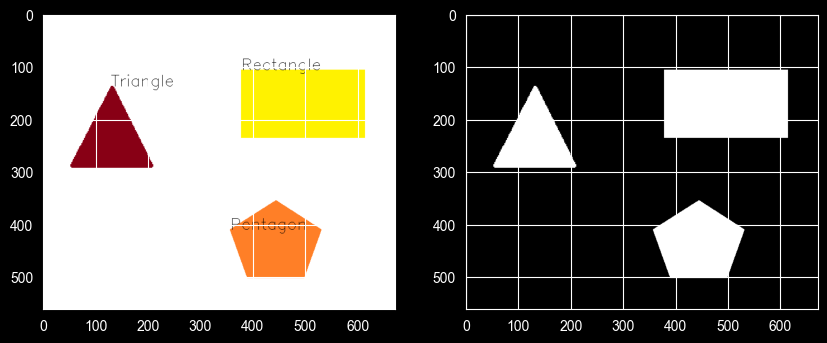

In [59]:
_, binary_img = cv.threshold(to_gray(shapes2_img), 245, 255, cv.THRESH_BINARY_INV)
contours, _ = cv.findContours(binary_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

draw_img = shapes2_img.copy()

for cnt in contours:
    arcLen = cv.arcLength(cnt, True)
    app = cv.approxPolyDP(cnt, arcLen * 0.01, True)
    i, j = app[0][0]
    num_sides = len(app)
    shape_name = None
    match num_sides:
        case 3:
            shape_name = "Triangle"
        case 4:
            shape_name = "Rectangle"
        case 5:
            shape_name = "Pentagon"
        case 6:
            shape_name = "Hexagon"
        case _:
            shape_name = "Circle"

    cv.putText(draw_img, shape_name, (i, j), cv.FONT_HERSHEY_SIMPLEX, 1, 0, 1)

print("Contours:", len(contours))

plt.figure(figsize=(10,10))
plt.subplot(121);plt.imshow(draw_img[...,::-1])
plt.subplot(122);plt.imshow(binary_img, cmap="gray")

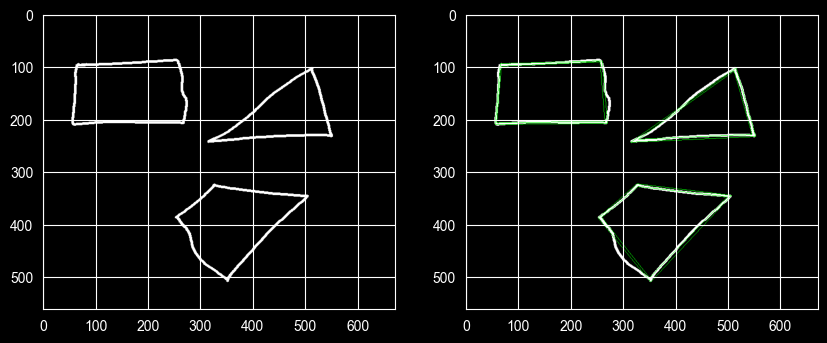

In [72]:
_, binary_img = cv.threshold(to_gray(sketch_img), 127, 255, cv.THRESH_BINARY_INV)
binary_img = cv.dilate(binary_img, cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5)))

contours, _ = cv.findContours(binary_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

draw_img = cv.cvtColor(binary_img, cv.COLOR_GRAY2BGR)

for cnt in contours:
    epsilon = cv.arcLength(cnt, True) * 0.03
    new_cnt = cv.approxPolyDP(cnt, epsilon, True)
    cv.drawContours(draw_img, [new_cnt], -1, (0, 255, 0), 1)


plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(binary_img, cmap="gray")
plt.subplot(122); plt.imshow(draw_img[...,::-1])